In [173]:
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline

In [50]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [51]:
cab_data = pd.read_csv("cab_rides.csv")
cab_data=reduce_mem_usage(cab_data)
weather_data = pd.read_csv("weather.csv")
weather_data=reduce_mem_usage(weather_data)


Memory usage of dataframe is 52.88 MB --> 44.95 MB (Decreased by 15.0%)
Memory usage of dataframe is 0.38 MB --> 0.22 MB (Decreased by 43.7%)


In [52]:
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [53]:
import datetime
cab_data['datetime']= pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])

In [54]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime'],
      dtype='object')

In [91]:
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time
0,42.419998,Back Bay,1.00,1012.140015,0.1228,1545003901,0.77,11.25,1970-01-01 00:00:01.545003901
1,42.430000,Beacon Hill,1.00,1012.150024,0.1846,1545003901,0.76,11.32,1970-01-01 00:00:01.545003901
2,42.500000,Boston University,1.00,1012.150024,0.1089,1545003901,0.76,11.07,1970-01-01 00:00:01.545003901
3,42.110001,Fenway,1.00,1012.130005,0.0969,1545003901,0.77,11.09,1970-01-01 00:00:01.545003901
4,43.130001,Financial District,1.00,1012.140015,0.1786,1545003901,0.75,11.49,1970-01-01 00:00:01.545003901
...,...,...,...,...,...,...,...,...,...
6271,44.720001,North Station,0.89,1000.690002,NaN,1543819974,0.96,1.52,1970-01-01 00:00:01.543819974
6272,44.849998,Northeastern University,0.88,1000.710022,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974
6273,44.820000,South Station,0.89,1000.700012,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974
6274,44.779999,Theatre District,0.89,1000.700012,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974


In [55]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'date_time'],
      dtype='object')

In [56]:
cab_data.shape

(693071, 11)

In [57]:
weather_data.shape

(6276, 9)

In [58]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.190057,1.544046e+12,16.543797,1.013870
std,1.138935,6.891925e+08,9.319172,0.091467
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [59]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090378,0.677775,1008.443176,0.057652,1.543857e+09,0.763976,6.802810
std,6.022061,0.314283,12.870790,0.100758,6.659340e+05,0.127340,3.633476
min,19.620001,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077501,0.440000,997.747498,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130001,0.780000,1007.659973,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832501,0.970000,1018.479980,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.119995,0.780700,1.545159e+09,0.990000,18.180000


In [60]:
a=pd.concat([cab_data,weather_data])

In [186]:
a

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.000000,0,0.00,0.000000,0.0,0.00,0.00,0,0.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.000000,0,0.00,0.000000,0.0,0.00,0.00,0,0.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,0.000000,0,0.00,0.000000,0.0,0.00,0.00,0,0.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.000000,0,0.00,0.000000,0.0,0.00,0.00,0,0.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.000000,0,0.00,0.000000,0.0,0.00,0.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,0.00,0,1543819974,0,0,0.0,0.0,0,0,0,...,44.720001,North Station,0.89,1000.690002,0.0,0.96,1.52,1970-01-01 00:00:01.543819974,1.0,0.0
6272,0.00,0,1543819974,0,0,0.0,0.0,0,0,0,...,44.849998,Northeastern University,0.88,1000.710022,0.0,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6273,0.00,0,1543819974,0,0,0.0,0.0,0,0,0,...,44.820000,South Station,0.89,1000.700012,0.0,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6274,0.00,0,1543819974,0,0,0.0,0.0,0,0,0,...,44.779999,Theatre District,0.89,1000.700012,0.0,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0


In [61]:
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [62]:
a.fillna(0,inplace=True)

In [63]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [64]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<AxesSubplot:xlabel='cab_type'>

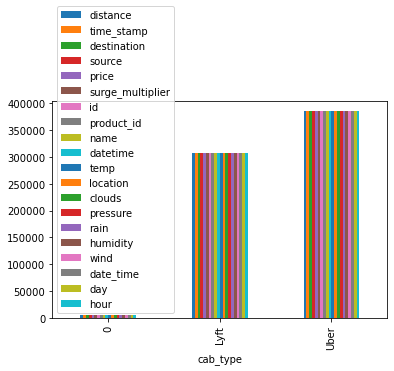

In [65]:
a.groupby('cab_type').count().plot.bar()


<AxesSubplot:>

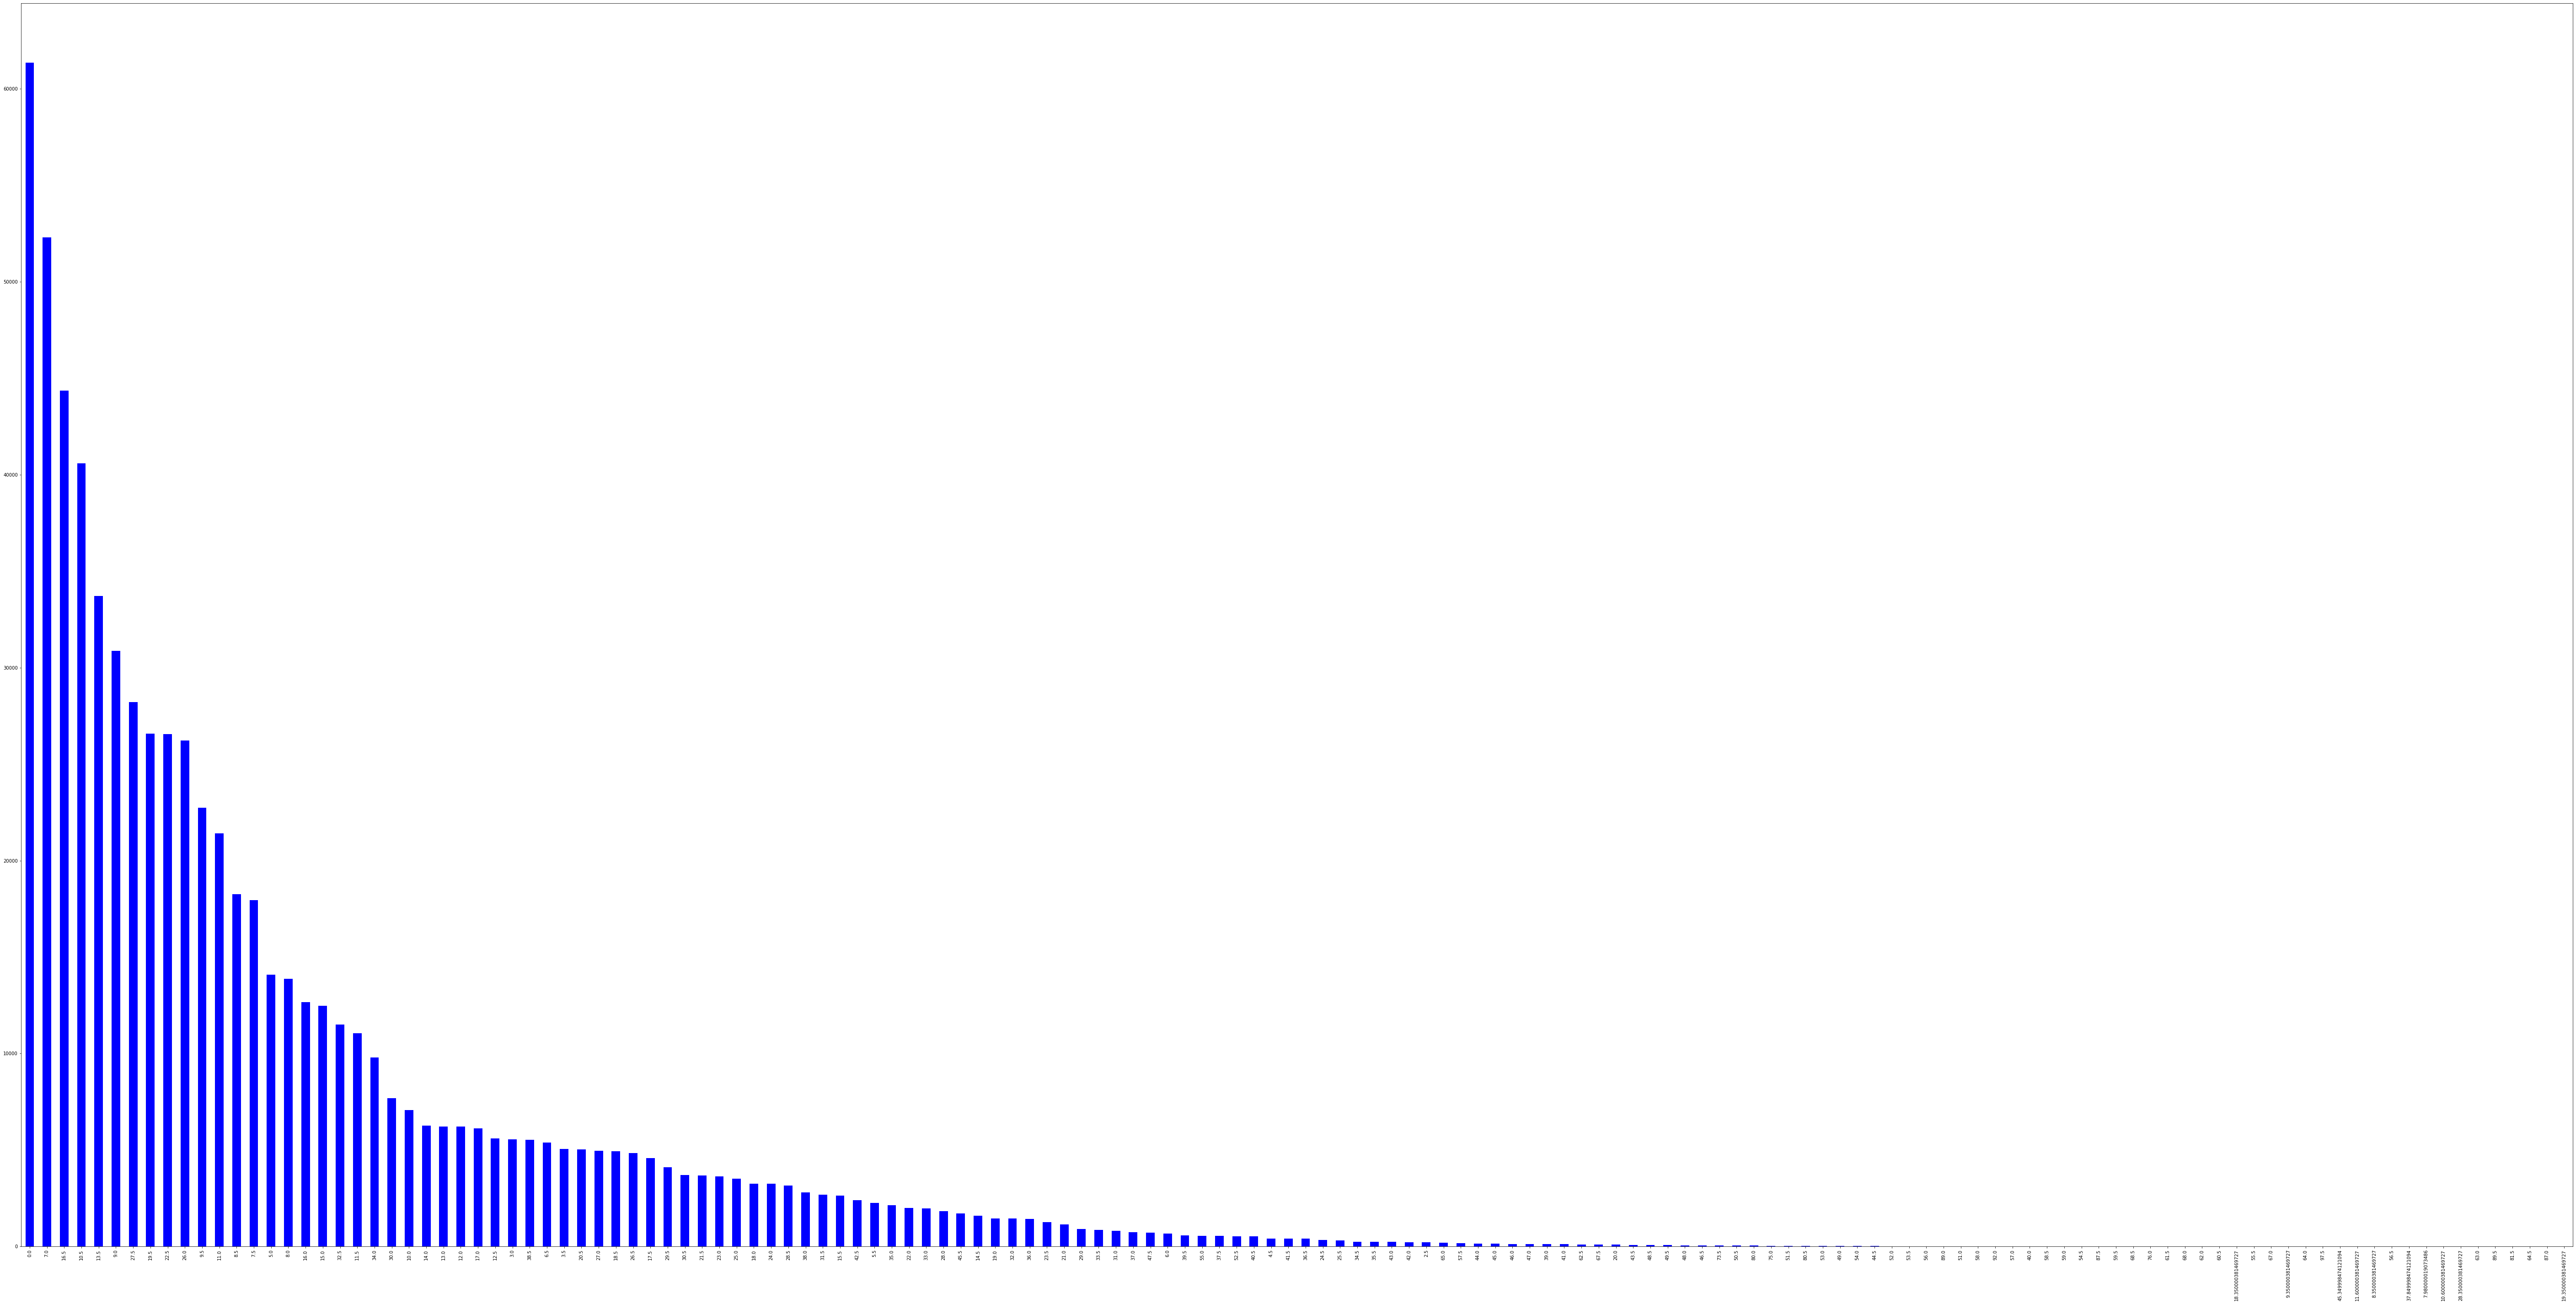

In [66]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')


<AxesSubplot:>

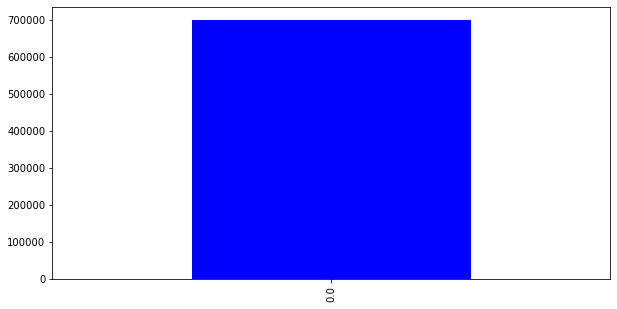

In [67]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')


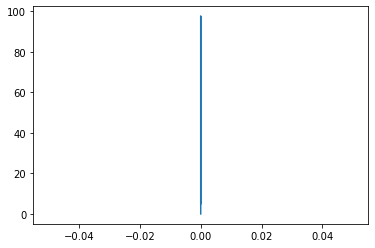

In [68]:
import matplotlib.pyplot as plt
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()


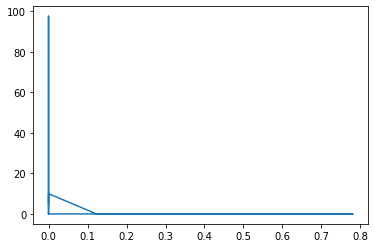

In [69]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [70]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [163]:
x1=a[['distance', 'temp','clouds', 'pressure', 'humidity','wind','rain','day','hour','surge_multiplier','clouds']]
y1=a['price']

In [164]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [109]:
linear=LinearRegression()
linear.fit(x_train,y_train)
linear.score(x_test, y_test)

0.1563858041768127

<h2>Performance Metrics</h2>

In [106]:
linear.intercept_

-15.433842437533063

In [107]:
linear.coef_

array([ 2.54489026e+00, -1.64620938e-14, -1.12950771e-13,  1.46767857e-14,
        6.35578344e-13,  2.76748123e-13, -6.67138380e-13,  1.54338424e+01,
        3.55271368e-15,  2.47433849e+01, -1.26502412e-13])

In [124]:
predictions=linear.predict(x_test)
print(predictions)

[32.5479163  14.7556079  16.81696887 ... 11.82898386 11.85443274
 13.22867338]


In [75]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
81607,42.5,32.547916
354,0.0,14.755608
471801,32.5,16.816969
407645,27.5,10.480192
474760,27.5,10.556539
...,...,...
538489,7.5,10.709232
579511,13.5,15.519075
5421,9.0,11.828984
279982,8.0,11.854433


In [84]:
from sklearn.metrics import mean_absolute_error as mae
print(mae(y_test,predictions))

7.407742219419063


In [89]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predictions)
np.sqrt(mse(y_test,predictions))

9.238360809376323

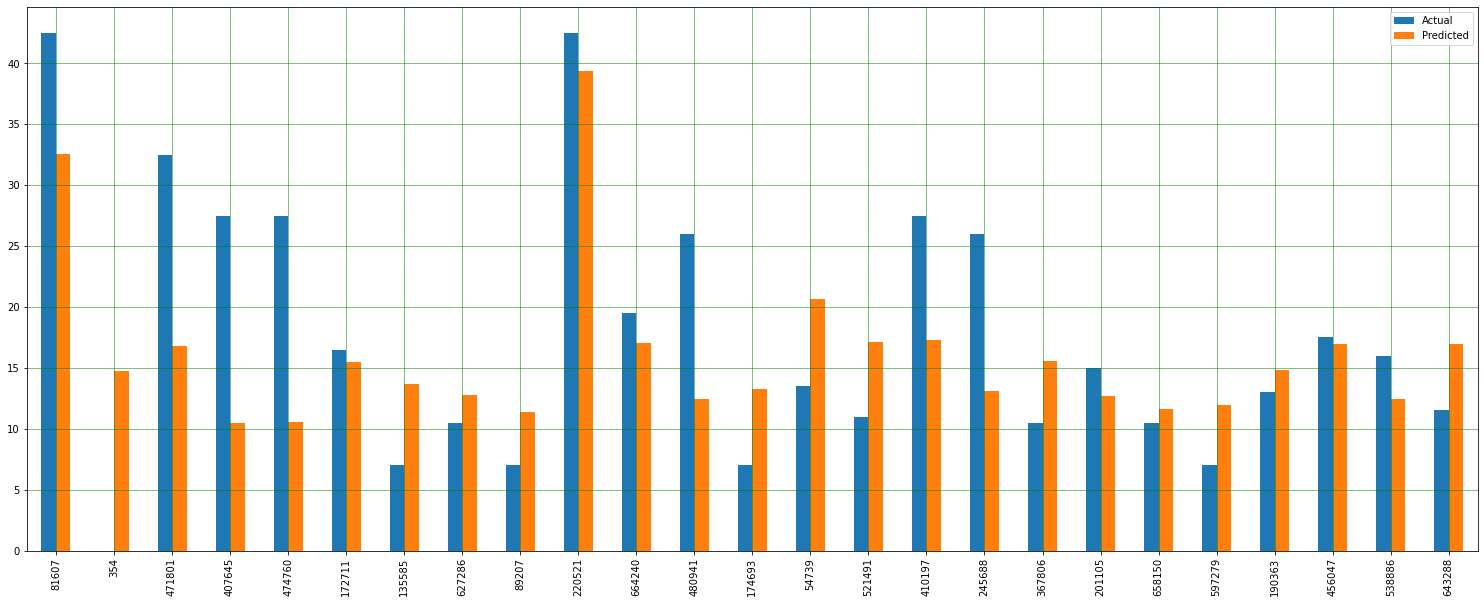

In [190]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<h6>Training again with positive coefficients<h6>
    


In [191]:
x11=a[['distance', 'day','surge_multiplier']]
y11=a['price']

In [192]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x11, y11, test_size = 0.25, random_state = 42)

In [193]:
linear=LinearRegression()
linear.fit(x_train,y_train)
linear.score(x_test, y_test)

0.15638580417681291

In [194]:
linear.coef_

array([ 2.54489026, 15.43384244, 24.74338491])

In [132]:
predictions=linear.predict(x_test)
print(predictions)

[32.5479163  14.7556079  16.81696887 ... 11.82898386 11.85443274
 13.22867338]


In [147]:
from sklearn.metrics import mean_absolute_error as mae
print(mae(y_test,predictions))

7.40774221941906
